# Seminar 2 PyTorch Tutorial + Text classification with convolutional NNs

Following resources have been used in preparation of this notebook:
* PyTorch Tutorial Notebook, [PyTorch Tutorial](https://colab.research.google.com/drive/1Pz8b_h-W9zIBk1p2e6v-YFYThG1NkYeS?usp=sharing) by Dilara Soylu and Ethan Chi, offered on CS224N course in Stanford

# Please make a copy into your own Drive!

## Introduction
[PyTorch](https://pytorch.org/) is a deep learning framework, one of the two main frameworks alongside [TensorFlow](https://www.tensorflow.org/). The installation can be done via Pip or Conda, as described [here](https://pytorch.org/). Let's start by importing PyTorch:

\#Question: Why don't we just use Numpy?

In [88]:
import torch
import torch.nn as nn

# Import pprint, module we use for making our print statements prettier
import pprint
pp = pprint.PrettyPrinter()

Main advantages:
1. Automatic Differentiation (Autograd)
2. GPU Acceleration
3. Built-in Neural Network Modules

We are all set to start our tutorial. Let's dive in!

# Main Modules in PyTorch

1.  **`torch`**

    This is the base library. It contains the `Tensor` object and a huge number of mathematical functions that operate on Tensors (like `torch.add`, `torch.matmul`, `torch.sigmoid`, etc.). It's the equivalent of the base `numpy` library.

2.  **`torch.nn`** (Neural Networks)

    This is where the "Lego Kits" are. It provides all the building blocks for creating neural networks.

    > **Layers:** Pre-built layers like `nn.Linear` (a standard fully-connected layer), `nn.Conv2d` (for images), and `nn.LSTM` (for sequences).
    >
    > **Loss Functions:** Ways to measure your model's error, like `nn.MSELoss` (Mean Squared Error for regression) or `nn.CrossEntropyLoss` (for classification).
    >
    > **Containers:** A special class called `nn.Module`. All of your models will be classes that inherit from `nn.Module`. This gives them the ability to track parameters, move to the GPU, and more.

3.  **`torch.autograd`**

    You rarely use this directly, but it's the engine running under the hood. When you create a tensor with `requires_grad=True`, `autograd` starts building a graph of operations. When you call `.backward()` on a result (like your loss), it travels backward through this graph, calculating the gradients for each parameter.

4.  **`torch.optim`** (Optimizers)

    This module contains algorithms to update your model's weights based on the gradients calculated by `autograd`. This is the "how to improve" part. You give it your model's parameters and a learning rate, and it handles the updates.

    **Common optimizers include:** `optim.SGD` (Stochastic Gradient Descent), `optim.Adam`, and `optim.RMSprop`.

5.  **`torch.utils.data`**

    Deep learning requires a lot of data. This module provides tools to make data loading easy and efficient.

    > **`Dataset`:** A class you can use to represent your dataset. You typically implement `__len__` (to return the size) and `__getitem__` (to get a single data point).
    >
    > **`DataLoader`:** This is a magical utility. You wrap your `Dataset` in a `DataLoader`, and it will automatically handle batching your data, shuffling it, and even loading it in parallel using multiple CPU cores. This prevents your GPU from sitting idle waiting for data.

##Part 1: Tensors

**Tensors** are PyTorch's most basic building block. Each tensor is a multi-dimensional matrix; for example, a 256x256 square image might be represented by a `3x256x256` tensor, where the first dimension represents color. Here's how to create a tensor:


In [89]:
list_of_lists = [
  [1, 2, 3],
  [4, 5, 6],
]
print(list_of_lists)

[[1, 2, 3], [4, 5, 6]]


In [90]:
data = torch.tensor(list_of_lists)
print(data)

tensor([[1, 2, 3],
        [4, 5, 6]])


In [91]:
# Initializing a tensor
data = torch.tensor([
                     [0, 1],
                     [2, 3],
                     [4, 5]
                    ])
print(data)

tensor([[0, 1],
        [2, 3],
        [4, 5]])


Each tensor has a **data type**: the major data types you'll need to worry about are floats (`torch.float32`) and integers (`torch.int`). You can specify the data type explicitly when you create the tensor:

In [92]:
# Initializing a tensor with an explicit data type
# Notice the dots after the numbers, which specify that they're floats
data = torch.tensor([
                     [0, 1],
                     [2, 3],
                     [4, 5]
                    ], dtype=torch.float32)
print(data)

tensor([[0., 1.],
        [2., 3.],
        [4., 5.]])


In [93]:
# Initializing a tensor with an explicit data type
# Notice the dots after the numbers, which specify that they're floats
data = torch.tensor([
                     [0.11111111, 1],
                     [2, 3],
                     [4, 5]
                    ], dtype=torch.float32)
print(data)

tensor([[0.1111, 1.0000],
        [2.0000, 3.0000],
        [4.0000, 5.0000]])


In [94]:
# Initializing a tensor with an explicit data type
# Notice the dots after the numbers, which specify that they're floats
data = torch.tensor([
                     [0.11111111, 1],
                     [2, 3],
                     [4, 5]
                    ])
print(data)

tensor([[0.1111, 1.0000],
        [2.0000, 3.0000],
        [4.0000, 5.0000]])


!!! Don't confuse torch.tensor with torch.Tensor.

torch.tensor returns tensor with type of input data.

torch.Tensor returns tensor with type FloatTensor.





Utility functions also exist to create tensors with given shapes and contents:

In [95]:
zeros = torch.zeros(2, 5)  # a tensor of all zeros
print(zeros)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])


In [96]:
ones = torch.ones(3, 4)   # a tensor of all ones
print(ones)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])


In [97]:
rr = torch.arange(1, 10) # range from [1, 10)
print(rr)

tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])


In [98]:
rr + 2

tensor([ 3,  4,  5,  6,  7,  8,  9, 10, 11])

In [99]:
rr * 2

tensor([ 2,  4,  6,  8, 10, 12, 14, 16, 18])

In [100]:
a = torch.tensor([[1, 2], [2, 3], [4, 5]])      # (3, 2)
b = torch.tensor([[1, 2, 3, 4], [5, 6, 7, 8]])  # (2, 4)

print("A is", a)
print("B is", b)
print("The product is", a.matmul(b)) #(3, 4)
print("The other product is", a @ b) # +, -, *, @

A is tensor([[1, 2],
        [2, 3],
        [4, 5]])
B is tensor([[1, 2, 3, 4],
        [5, 6, 7, 8]])
The product is tensor([[11, 14, 17, 20],
        [17, 22, 27, 32],
        [29, 38, 47, 56]])
The other product is tensor([[11, 14, 17, 20],
        [17, 22, 27, 32],
        [29, 38, 47, 56]])


The **shape** of a matrix (which can be accessed by `.shape`) is defined as the dimensions of the matrix. Here's some examples:

In [101]:
matr_2d = torch.tensor([[1, 2, 3], [4, 5, 6]])
print(matr_2d.shape)
print(matr_2d)

torch.Size([2, 3])
tensor([[1, 2, 3],
        [4, 5, 6]])


In [102]:
matr_3d = torch.tensor([[[1, 2, 3, 4], [-2, 5, 6, 9]], [[5, 6, 7, 2], [8, 9, 10, 4]], [[-3, 2, 2, 1], [4, 6, 5, 9]]])
print(matr_3d)
print(matr_3d.shape)

tensor([[[ 1,  2,  3,  4],
         [-2,  5,  6,  9]],

        [[ 5,  6,  7,  2],
         [ 8,  9, 10,  4]],

        [[-3,  2,  2,  1],
         [ 4,  6,  5,  9]]])
torch.Size([3, 2, 4])


**Reshaping** tensors can be used to make batch operations easier (more on that later), but be careful that the data is reshaped in the order you expect:

In [103]:
rr = torch.arange(1, 16)
print("The shape is currently", rr.shape)
print("The contents are currently", rr)
print()
rr = rr.view(5, 3)
print("After reshaping, the shape is currently", rr.shape)
print("The contents are currently", rr)

The shape is currently torch.Size([15])
The contents are currently tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

After reshaping, the shape is currently torch.Size([5, 3])
The contents are currently tensor([[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12],
        [13, 14, 15]])


!!! Be careful with rr.reshape, it is better to use rr.view.

Finally, you can also inter-convert tensors with **NumPy arrays**:

In [104]:
import numpy as np

# numpy.ndarray --> torch.Tensor:
arr = np.array([[1, 0, 5]])
data = torch.tensor(arr)
print("This is a torch.tensor", data)

# torch.Tensor --> numpy.ndarray:
new_arr = data.numpy()
print("This is a np.ndarray", new_arr)

This is a torch.tensor tensor([[1, 0, 5]])
This is a np.ndarray [[1 0 5]]


One of the reasons why we use **tensors** is *vectorized operations*: operations that be conducted in parallel over a particular dimension of a tensor.

In [105]:
data = torch.arange(1, 36, dtype=torch.float32).reshape(5, 7)
print("Data is:", data)

# We can perform operations like *sum* over each row...
print("Taking the sum over rows:")
print(data.sum(dim=1)) #(5,)

# or over each column.
print("Taking thep sum over columns:")
print(data.sum(dim=0)) #(7,)

# Other operations are available:
print("Taking the stdev over rows:")
print(data.std(dim=1))


Data is: tensor([[ 1.,  2.,  3.,  4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11., 12., 13., 14.],
        [15., 16., 17., 18., 19., 20., 21.],
        [22., 23., 24., 25., 26., 27., 28.],
        [29., 30., 31., 32., 33., 34., 35.]])
Taking the sum over rows:
tensor([ 28.,  77., 126., 175., 224.])
Taking thep sum over columns:
tensor([ 75.,  80.,  85.,  90.,  95., 100., 105.])
Taking the stdev over rows:
tensor([2.1602, 2.1602, 2.1602, 2.1602, 2.1602])


In [106]:
data = torch.arange(1, 7, dtype=torch.float32).reshape(1, 2, 3)
print(data)
print(data.sum(dim=0).sum(dim=0))
print(data.sum(dim=0).sum(dim=0).shape)

tensor([[[1., 2., 3.],
         [4., 5., 6.]]])
tensor([5., 7., 9.])
torch.Size([3])


In [107]:
data.sum()

tensor(21.)

**Indexing**

You can access arbitrary elements of a tensor using the `[]` operator.

In [108]:
# Initialize an example tensor
x = torch.Tensor([
                  [[1, 2], [3, 4]],
                  [[5, 6], [7, 8]],
                  [[9, 10], [11, 12]]
                 ])
x

tensor([[[ 1.,  2.],
         [ 3.,  4.]],

        [[ 5.,  6.],
         [ 7.,  8.]],

        [[ 9., 10.],
         [11., 12.]]])

In [109]:
x.shape

torch.Size([3, 2, 2])

In [110]:
# Access the 0th element, which is the first row
x[0] # Equivalent to x[0, :]

tensor([[1., 2.],
        [3., 4.]])

In [111]:
x[:, 0]

tensor([[ 1.,  2.],
        [ 5.,  6.],
        [ 9., 10.]])

We can also index into multiple dimensions with `:`.

In [112]:
# Get the top left element of each element in our tensor
x[:, 0, 0]

tensor([1., 5., 9.])

In [113]:
x[:, :, :]

tensor([[[ 1.,  2.],
         [ 3.,  4.]],

        [[ 5.,  6.],
         [ 7.,  8.]],

        [[ 9., 10.],
         [11., 12.]]])

We can also access arbitrary elements in each dimension.

In [114]:
# Let's access the 0th and 1st elements, each twice
# same as stacking x[0], x[0], x[1], x[1]
i = torch.tensor([0, 0, 1, 1])
x[i]

tensor([[[1., 2.],
         [3., 4.]],

        [[1., 2.],
         [3., 4.]],

        [[5., 6.],
         [7., 8.]],

        [[5., 6.],
         [7., 8.]]])

In [115]:
# Let's access the 0th elements of the 1st and 2nd elements

i = torch.tensor([1, 2])
j = torch.tensor([0])
x[i, j]

tensor([[ 5.,  6.],
        [ 9., 10.]])

We can get a `Python` scalar value from a tensor with `item()`.

In [116]:
x[0, 0, 0]

tensor(1.)

In [117]:
x[0, 0, 0].item()

1.0

### Exercise:

Write code that creates a `torch.tensor` with the following contents:
$\begin{bmatrix} 1 & 2.2 & 9.6 \\ 4 & -7.2 & 6.3 \end{bmatrix}$

How do you get the first column? The first row?



In [118]:
# Your code


## Autograd
Pytorch is well-known for its automatic differentiation feature. We can call the `backward()` method to ask `PyTorch` to calculate the gradients, which are then stored in the `grad` attribute.

In [119]:
# Create an example tensor
# requires_grad parameter tells PyTorch to store gradients
x = torch.tensor([2.], requires_grad=True)

# Print the gradient if it is calculated
# Currently None since x is a scalar
pp.pprint(x.grad)

None


In [120]:
# Calculating the gradient of y with respect to x
y = x * x * 3 # 3x^2
y.backward()
pp.pprint(x.grad)

tensor([12.])


Let's run backprop from a different tensor again to see what happens.

In [121]:
z = x * x * 3 # 3x^2
z.backward()
pp.pprint(x.grad)

tensor([24.])


What just happened?

In [122]:
x.grad = None
z = x * x * 3 # 3x^2
z.backward()
# y = x * x * 3
pp.pprint(x.grad)

tensor([12.])


In [123]:
z = x * x * 3 # 3x^2
z.backward()
# y = x * x * 3
pp.pprint(x.grad)

tensor([24.])


In [124]:
z = x * x * 3 # 3x^2
z.backward()
# y = x * x * 3
pp.pprint(x.grad)

tensor([36.])


We can see that the `x.grad` is updated to be the sum of the gradients calculated so far. When we run backprop in a neural network, we sum up all the gradients for a particular neuron before making an update. This is exactly what is happening here! This is also the reason why we need to run `zero_grad()` in every training iteration (more on this later). Otherwise our gradients would keep building up from one training iteration to the other, which would cause our updates to be wrong.

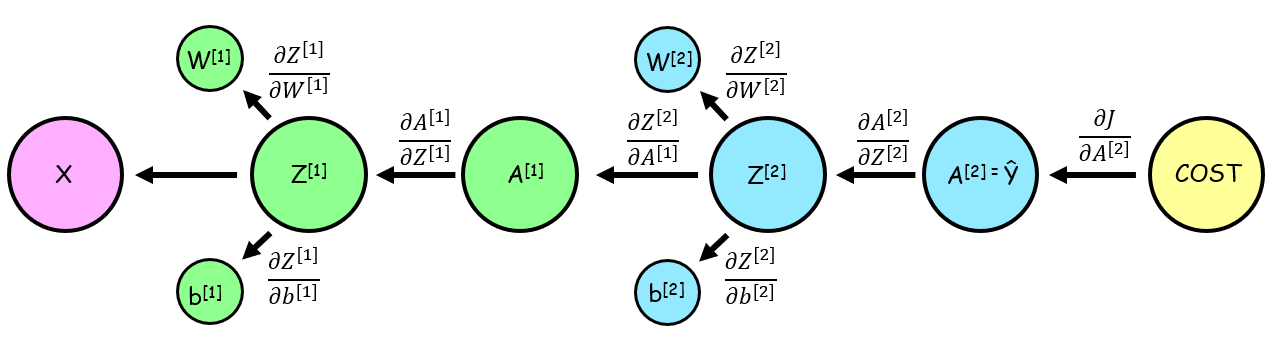

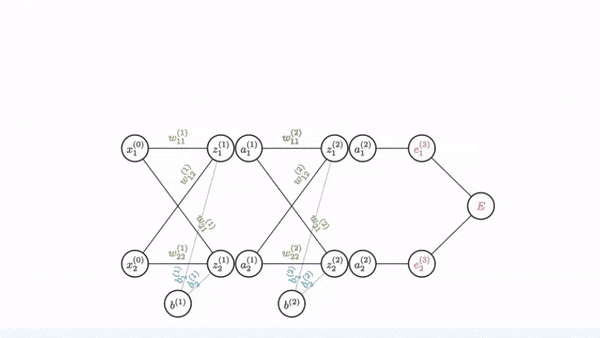

Please, watch a [video](https://vk.com/video-155161349_456239205) in RUSSIAN about backpropagation if you don't understand it.

## Neural Network Module

So far we have looked into the tensors, their properties and basic operations on tensors. These are especially useful to get familiar with if we are building the layers of our network from scratch. We will use predefined blocks in the `torch.nn` module of `PyTorch`. We will then put together these blocks to create complex networks. Let's start by importing this module with an alias so that we don't have to type `torch` every time we use it.

In [125]:
import torch.nn as nn
import torch

### **Linear Layer**
We can use `nn.Linear(H_in, H_out)` to create a a linear layer. This will take a matrix of `(N, *, H_in)` dimensions and output a matrix of `(N, *, H_out)`. The `*` denotes that there could be arbitrary number of dimensions in between. The linear layer performs the operation `Ax+b`, where `A` and `b` are initialized randomly. If we don't want the linear layer to learn the bias parameters, we can initialize our layer with `bias=False`.

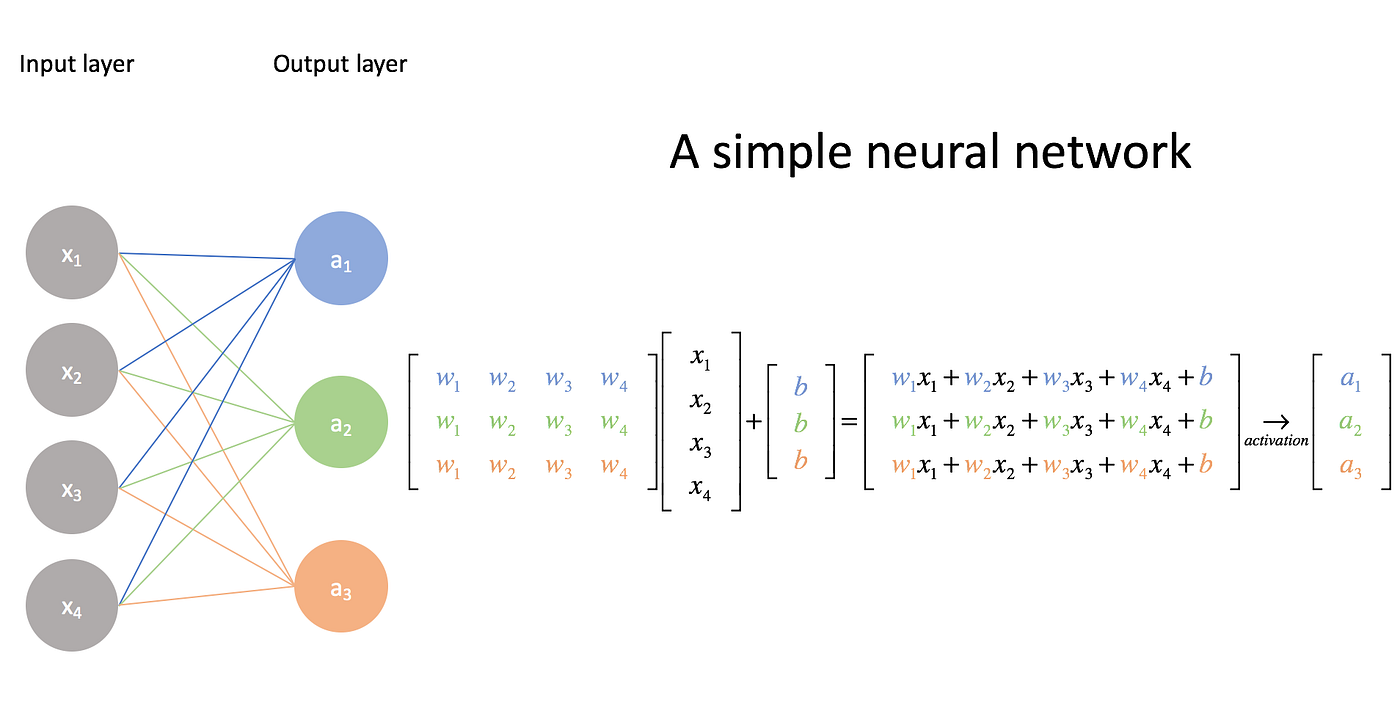

In [126]:
# Create the inputs
input = torch.ones(2,3,4)
# N* H_in -> N*H_out


# Make a linear layers transforming N,*,H_in dimensinal inputs to N,*,H_out
# dimensional outputs
# Your code
linear = nn.Linear(4, 2)
linear_output = linear(input)
linear_output

tensor([[[-0.2622,  0.2545],
         [-0.2622,  0.2545],
         [-0.2622,  0.2545]],

        [[-0.2622,  0.2545],
         [-0.2622,  0.2545],
         [-0.2622,  0.2545]]], grad_fn=<ViewBackward0>)

In [127]:
linear_output.shape

torch.Size([2, 3, 2])

In [128]:
list(linear.parameters()) # Ax + b

[Parameter containing:
 tensor([[-0.0714,  0.1831,  0.1683, -0.4080],
         [ 0.3401,  0.1907, -0.2754,  0.0613]], requires_grad=True),
 Parameter containing:
 tensor([-0.1342, -0.0622], requires_grad=True)]

In [129]:
# Data of shape [batch_size, feature_dim] # 4
# [batch_size, output_dim] # 2

# linear layer of shape (feature_dim, output_dim)

### **Other Module Layers**
There are several other preconfigured layers in the `nn` module. Some commonly used examples are `nn.Conv2d`, `nn.ConvTranspose2d`, `nn.BatchNorm1d`, `nn.BatchNorm2d`, `nn.Upsample` and `nn.MaxPool2d` among many others. We will learn more about these as we progress in the course. For now, the only important thing to remember is that we can treat each of these layers as plug and play components: we will be providing the required dimensions and `PyTorch` will take care of setting them up.

### **Activation Function Layer**
We can also use the `nn` module to apply activations functions to our tensors. Activation functions are used to add non-linearity to our network. Some examples of activations functions are `nn.ReLU()`, `nn.Sigmoid()` and `nn.LeakyReLU()`. Activation functions operate on each element seperately, so the shape of the tensors we get as an output are the same as the ones we pass in.

In [130]:
linear_output

tensor([[[-0.2622,  0.2545],
         [-0.2622,  0.2545],
         [-0.2622,  0.2545]],

        [[-0.2622,  0.2545],
         [-0.2622,  0.2545],
         [-0.2622,  0.2545]]], grad_fn=<ViewBackward0>)

In [131]:
sigmoid = nn.Sigmoid()
output = sigmoid(linear_output)
output

tensor([[[0.4348, 0.5633],
         [0.4348, 0.5633],
         [0.4348, 0.5633]],

        [[0.4348, 0.5633],
         [0.4348, 0.5633],
         [0.4348, 0.5633]]], grad_fn=<SigmoidBackward0>)

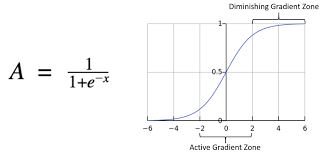

### **Putting the Layers Together**
So far we have seen that we can create layers and pass the output of one as the input of the next. Instead of creating intermediate tensors and passing them around, we can use `nn.Sequentual`, which does exactly that.

In [132]:
block = nn.Sequential(
    nn.Linear(4, 2),
    nn.Sigmoid()
)

input = torch.ones(2,3,4)
output = block(input)
output

tensor([[[0.4123, 0.5486],
         [0.4123, 0.5486],
         [0.4123, 0.5486]],

        [[0.4123, 0.5486],
         [0.4123, 0.5486],
         [0.4123, 0.5486]]], grad_fn=<SigmoidBackward0>)

### Custom Modules

Instead of using the predefined modules, we can also build our own by extending the `nn.Module` class. For example, we can build a the `nn.Linear` (which also extends `nn.Module`) on our own using the tensor introduced earlier! We can also build new, more complex modules, such as a custom neural network. You will be practicing these in the later assignment.

To create a custom module, the first thing we have to do is to extend the `nn.Module`. We can then initialize our parameters in the `__init__` function, starting with a call to the `__init__` function of the super class. All the class attributes we define which are `nn` module objects are treated as parameters, which can be learned during the training. Tensors are not parameters, but they can be turned into parameters if they are wrapped in `nn.Parameter` class.

All classes extending `nn.Module` are also expected to implement a `forward(x)` function, where `x` is a tensor. This is the function that is called when a parameter is passed to our module, such as in `model(x)`.

In [133]:
class MultilayerPerceptron(nn.Module):

  def __init__(self, input_size, hidden_size):
    # Call to the __init__ function of the super class
    super().__init__()

    # Bookkeeping: Saving the initialization parameters
    self.input_size = input_size
    self.hidden_size = hidden_size

    # Defining of our model
    # There isn't anything specific about the naming of `self.model`. It could
    # be something arbitrary.
    self.model = nn.Sequential(
        nn.Linear(self.input_size, self.hidden_size),
        nn.ReLU(),
        nn.Linear(self.hidden_size, self.input_size),
        nn.Sigmoid()
    )

  def forward(self, x):
    output = self.model(x)
    return output

Here is an alternative way to define the same class. You can see that we can replace `nn.Sequential` by defining the individual layers in the `__init__` method and connecting the in the `forward` method.

In [134]:
class MultilayerPerceptron(nn.Module):

  def __init__(self, input_size, hidden_size):
    # Call to the __init__ function of the super class
    super().__init__()

    # Bookkeeping: Saving the initialization parameters
    self.input_size = input_size
    self.hidden_size = hidden_size

    # Defining of our layers
    self.linear = nn.Linear(self.input_size, self.hidden_size)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(self.hidden_size, self.input_size)
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    linear = self.linear(x)
    relu = self.relu(linear)
    linear2 = self.linear2(relu)
    output = self.sigmoid(linear2)
    return output

Now that we have defined our class, we can instantiate it and see what it does.

In [135]:
# Make a sample input
input = torch.randn(2, 5)

# Create our model
model = MultilayerPerceptron(5, 3)

# Pass our input through our model
model(input)

tensor([[0.6085, 0.4179, 0.4451, 0.5120, 0.3183],
        [0.5690, 0.4108, 0.4707, 0.4472, 0.3213]], grad_fn=<SigmoidBackward0>)

We can inspect the parameters of our model with `named_parameters()` and `parameters()` methods.

In [136]:
list(model.named_parameters())

[('linear.weight',
  Parameter containing:
  tensor([[ 0.3389, -0.3912,  0.2910,  0.0710, -0.3517],
          [-0.0409,  0.3221,  0.3916, -0.1141, -0.2853],
          [-0.2538,  0.3420, -0.1027,  0.3690,  0.0661]], requires_grad=True)),
 ('linear.bias',
  Parameter containing:
  tensor([ 0.2253, -0.1155, -0.2242], requires_grad=True)),
 ('linear2.weight',
  Parameter containing:
  tensor([[ 0.3321,  0.2718, -0.3528],
          [ 0.0791, -0.1085, -0.4380],
          [-0.4464, -0.2594, -0.0722],
          [ 0.3156,  0.5287, -0.3990],
          [-0.4244, -0.1052, -0.3077]], requires_grad=True)),
 ('linear2.bias',
  Parameter containing:
  tensor([ 0.1033, -0.3021,  0.1666, -0.4444, -0.4833], requires_grad=True))]

## Optimization
We have showed how gradients are calculated with the `backward()` function. Having the gradients isn't enought for our models to learn. We also need to know how to update the parameters of our models. This is where the optomozers comes in. `torch.optim` module contains several optimizers that we can use. Some popular examples are `optim.SGD` and `optim.Adam`. When initializing optimizers, we pass our model parameters, which can be accessed with `model.parameters()`, telling the optimizers which values it will be optimizing. Optimizers also has a learning rate (`lr`) parameter, which determines how big of an update will be made in every step. Different optimizers have different hyperparameters as well.

In [137]:
import torch.optim as optim

After we have our optimization function, we can define a `loss` that we want to optimize for. We can either define the loss ourselves, or use one of the predefined loss function in `PyTorch`, such as `nn.BCELoss()`. Let's put everything together now! We will start by creating some dummy data.

In [138]:
# Create the y data
y = torch.ones(10, 5)

# Add some noise to our goal y to generate our x
# We want out model to predict our original data, albeit the noise
x = y + torch.randn_like(y)
x

tensor([[ 1.3765, -0.6371,  0.4273,  1.7571,  0.5002],
        [ 2.3304,  2.1821,  0.9149,  0.3020,  1.4407],
        [ 0.9951,  1.1213,  0.3425, -0.0546,  0.4395],
        [ 2.4713,  1.3027,  1.1747,  1.1209,  2.8363],
        [ 2.3774,  2.0263,  2.5719,  1.3411, -0.2954],
        [ 2.3347, -0.1992,  1.4411,  2.8139,  1.5296],
        [ 0.4137,  2.2070,  1.4053,  1.4150,  1.5568],
        [ 1.8883, -0.4805,  0.5026, -0.7640, -0.2618],
        [-0.7256,  0.3107, -1.0429,  0.7204,  1.3239],
        [ 0.2710,  0.0540,  1.1841,  1.4047,  0.9001]])

Now, we can define our model, optimizer and the loss function.

In [139]:
# Instantiate the model
model = MultilayerPerceptron(5, 3)

# Define the optimizer
adam = optim.Adam(model.parameters(), lr=1e-1)

# Define loss using a predefined loss function
loss_function = nn.MSELoss()

# Calculate how our model is doing now
y_pred = model(x)
loss_function(y_pred, y).item()

0.25423458218574524

Let's see if we can have our model achieve a smaller loss. Now that we have everything we need, we can setup our training loop.

In [140]:
# Set the number of epoch, which determines the number of training iterations
n_epoch = 10

for epoch in range(n_epoch):
  # Set the gradients to 0
  adam.zero_grad()

  # Get the model predictions
  y_pred = model(x)

  # Get the loss
  loss = loss_function(y_pred, y)

  # Print stats
  print(f"Epoch {epoch}: traing loss: {loss}")

  # Compute the gradients
  loss.backward()

  # Take a step to optimize the weights
  adam.step()


Epoch 0: traing loss: 0.25423458218574524
Epoch 1: traing loss: 0.16594503819942474
Epoch 2: traing loss: 0.10688162595033646
Epoch 3: traing loss: 0.06441553682088852
Epoch 4: traing loss: 0.037539880722761154
Epoch 5: traing loss: 0.022610673680901527
Epoch 6: traing loss: 0.013234150595963001
Epoch 7: traing loss: 0.007887506857514381
Epoch 8: traing loss: 0.004699023440480232
Epoch 9: traing loss: 0.002766030142083764


In [141]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.7748, -0.5615, -0.7180, -0.1349, -0.1135],
         [ 0.6640,  1.0794,  0.5088,  0.7678,  1.1414],
         [-0.0971, -0.3012, -0.2938, -0.6451, -0.2888]], requires_grad=True),
 Parameter containing:
 tensor([-0.1102,  0.9180, -0.6533], requires_grad=True),
 Parameter containing:
 tensor([[ 0.0715,  0.8658,  0.0584],
         [ 0.3302,  1.3070,  0.6598],
         [ 0.7756,  0.6355,  0.8676],
         [ 0.1177,  1.1509, -0.0585],
         [ 0.0644,  1.2784,  0.4249]], requires_grad=True),
 Parameter containing:
 tensor([1.1453, 1.2909, 1.2211, 0.5447, 0.7458], requires_grad=True)]

You can see that our loss is decreasing. Let's check the predictions of our model now and see if they are close to our original `y`, which was all `1s`.

In [142]:
# See how our model performs on the training data
y_pred = model(x)
y_pred

tensor([[0.9818, 0.9962, 0.9647, 0.9869, 0.9929],
        [0.9994, 1.0000, 0.9969, 0.9998, 0.9999],
        [0.9838, 0.9969, 0.9676, 0.9888, 0.9941],
        [0.9998, 1.0000, 0.9988, 1.0000, 1.0000],
        [0.9990, 1.0000, 0.9958, 0.9997, 0.9999],
        [0.9992, 1.0000, 0.9963, 0.9998, 0.9999],
        [0.9994, 1.0000, 0.9969, 0.9998, 0.9999],
        [0.8841, 0.9327, 0.8666, 0.8485, 0.8864],
        [0.9607, 0.9897, 0.9641, 0.9641, 0.9769],
        [0.9889, 0.9982, 0.9753, 0.9933, 0.9966]], grad_fn=<SigmoidBackward0>)

In [143]:
# Create test data and check how our model performs on it
x2 = y + torch.randn_like(y)
y_pred = model(x2)
y_pred

tensor([[0.9817, 0.9962, 0.9645, 0.9868, 0.9928],
        [0.9907, 0.9987, 0.9783, 0.9947, 0.9974],
        [0.9970, 0.9998, 0.9906, 0.9988, 0.9995],
        [0.9975, 0.9998, 0.9916, 0.9991, 0.9996],
        [0.9902, 0.9985, 0.9775, 0.9943, 0.9972],
        [0.9980, 0.9999, 0.9928, 0.9993, 0.9997],
        [0.9750, 0.9939, 0.9556, 0.9800, 0.9886],
        [0.9996, 1.0000, 0.9977, 0.9999, 1.0000],
        [0.9986, 0.9999, 0.9945, 0.9996, 0.9998],
        [0.9990, 1.0000, 0.9956, 0.9997, 0.9999]], grad_fn=<SigmoidBackward0>)

Great! Looks like our model almost perfectly learned to filter out the noise from the `x` that we passed in!

## Demo: Sentence Classification with CNNs

Until this part of the notebook, we have learned the fundamentals of PyTorch and built a basic network solving a toy task. Now we will attempt to solve an example NLP task. Here are the things we will learn:

1. Data: Creating a Dataset of Batched Tensors
2. Modeling
3. Training
4. Prediction

In this section, our goal will be to train a model that will find if there is mentioned a `LOCATION` in a sentence or not.

### Data

The very first task of any machine learning project is to set up our training set. Usually, there will be a training corpus we will be utilizing. In NLP tasks, the corpus would generally be a `.txt` or `.csv` file where each row corresponds to a sentence or a tabular datapoint. In our toy task, we will assume that we have already read our data and the corresponding labels into a `Python` list.

In [144]:
import torch
import torch.nn as nn

In [145]:
# Our raw data, which consists of sentences
corpus = [
          "We always come to Paris",
          "The professor is from Australia",
          "I live in Stanford",
          "He comes from Taiwan",
          "The capital of Turkey is Ankara",
          "I like icecream",
          "The wind is strong today",
          "Silly Sally sells sea shells"
         ]

#### Preprocessing

To make it easier for our models to learn, we usually apply a few preprocessing steps to our data. This is especially important when dealing with text data. Here are some examples of text preprocessing:
* **Tokenization**: Tokenizing the sentences into words.
* **Lowercasing**: Changing all the letters to be lowercase.
* **Noise removal:** Removing special characters (such as punctuations).
* **Stop words removal**: Removing commonly used words.

Which preprocessing steps are necessary is determined by the task at hand. For example, although it is useful to remove special characters in some tasks, for others they may be important (for example, if we are dealing with multiple languages). For our task, we will lowercase our words and tokenize.


In [146]:
# The preprocessing function we will use to generate our training examples
# Our function is a simple one, we lowercase the letters
# and then tokenize the words.
def preprocess_sentence(sentence):
  return sentence.lower().split()

# Create our training set
train_sentences = [preprocess_sentence(sent) for sent in corpus]
train_sentences

[['we', 'always', 'come', 'to', 'paris'],
 ['the', 'professor', 'is', 'from', 'australia'],
 ['i', 'live', 'in', 'stanford'],
 ['he', 'comes', 'from', 'taiwan'],
 ['the', 'capital', 'of', 'turkey', 'is', 'ankara'],
 ['i', 'like', 'icecream'],
 ['the', 'wind', 'is', 'strong', 'today'],
 ['silly', 'sally', 'sells', 'sea', 'shells']]

For each training example we have, we should also have a corresponding label. Recall that the goal of our model was to determine if  there is a mention of a `LOCATION` in a sentence. That is, we want our model to output `0` for all sentences where there are no `LOCATION`s and `1` otherwise.

In [147]:
# Set of locations that appear in our corpus
locations = set(["australia", "ankara", "paris", "stanford", "taiwan", "turkey"])

# Our train labels
train_labels = [[1 if word in locations else 0 for word in sent] for sent in train_sentences]
print(train_labels)
train_labels = [max(sent) for sent in train_labels]
train_labels

[[0, 0, 0, 0, 1], [0, 0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 0, 1, 0, 1], [0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]


[1, 1, 1, 1, 1, 0, 0, 0]

#### Converting Words to Embeddings

Let's look at our training data a little more closely. Each datapoint we have is a sequence of words. On the other hand, we know that machine learning models work with numbers in vectors. How are we going to turn words into numbers? You may be thinking embeddings and you are right!

Imagine that we have an embedding lookup table `E`, where each row corresponds to an embedding. That is, each word in our vocabulary would have a corresponding embedding row `i` in this table. Whenever we want to find an embedding for a word, we will follow these steps:
1. Find the corresponding index `i` of the word in the embedding table: `word->index`.
2. Index into the embedding table and get the embedding: `index->embedding`.

Let's look at the first step. We should assign all the words in our vocabulary to a corresponding index. We can do it as follows:
1. Find all the unique words in our corpus.
2. Assign an index to each.

In [148]:
# Find all the unique words in our corpus
vocabulary = set(w for s in train_sentences for w in s)
vocabulary

{'always',
 'ankara',
 'australia',
 'capital',
 'come',
 'comes',
 'from',
 'he',
 'i',
 'icecream',
 'in',
 'is',
 'like',
 'live',
 'of',
 'paris',
 'professor',
 'sally',
 'sea',
 'sells',
 'shells',
 'silly',
 'stanford',
 'strong',
 'taiwan',
 'the',
 'to',
 'today',
 'turkey',
 'we',
 'wind'}

`vocabulary` now contains all the words in our corpus. On the other hand, during the test time, we can see words that are not contained in our vocabulary. If we can figure out a way to represent the unknown words, our model can still reason about whether they are a `LOCATION` or not, since we are also looking at the neighboring words for each prediction.

We introduce a special token, `<unk>`, to tackle the words that are out of vocabulary. We could pick another string for our unknown token if we wanted. The only requirement here is that our token should be unique: we should only be using this token for unknown words. We will also add this special token to our vocabulary.

In [149]:
# Add the unknown token to our vocabulary
vocabulary.add("<unk>")
vocabulary

{'<unk>',
 'always',
 'ankara',
 'australia',
 'capital',
 'come',
 'comes',
 'from',
 'he',
 'i',
 'icecream',
 'in',
 'is',
 'like',
 'live',
 'of',
 'paris',
 'professor',
 'sally',
 'sea',
 'sells',
 'shells',
 'silly',
 'stanford',
 'strong',
 'taiwan',
 'the',
 'to',
 'today',
 'turkey',
 'we',
 'wind'}

Convolutions allow our model to consider the surrounding `+N` or `-N` words of each word when making a prediction. In our earlier example `We always come to Paris` for `Paris`, if we have a window size of 1, that means our model will look at the words that come immediately before and after `Paris`, which are `to`, and, well, nothing. Now, this raises another issue. `Paris` is at the end of our sentence, so there isn't another word following it. Remember that we define the input dimensions of our `PyTorch` models when we are initializing them. If we set the window size to be `1`, it means that our model will be accepting `3` words in every pass. We cannot have our model expect `2` words from time to time.

The solution is to introduce a special token, such as `<pad>`, that will be added to our sentences to make sure that every word has a valid window around them. Similar to `<unk>` token, we could pick another string for our pad token if we wanted, as long as we make sure it is used for a unique purpose.

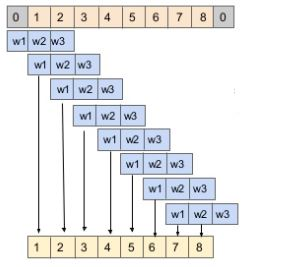

In [150]:
# Add the <pad> token to our vocabulary
vocabulary.add("<pad>")

# Function that pads the given sentence
# We are introducing this function here as an example
# We will be utilizing it later in the tutorial
def pad_window(sentence, window_size, pad_token="<pad>"):
  window = [pad_token] * window_size
  return window + sentence + window

# Show padding example
window_size = 2
pad_window(train_sentences[0], window_size=window_size)

['<pad>', '<pad>', 'we', 'always', 'come', 'to', 'paris', '<pad>', '<pad>']

Now that our vocabularly is ready, let's assign an index to each of our words.

In [151]:
# We are just converting our vocabularly to a list to be able to index into it
# Sorting is not necessary, we sort to show an ordered word_to_ind dictionary
# That being said, we will see that having the index for the padding token
# be 0 is convenient as some PyTorch functions use it as a default value
# such as nn.utils.rnn.pad_sequence, which we will cover in a bit
ix_to_word = sorted(list(vocabulary))

# Creating a dictionary to find the index of a given word
word_to_ix = {word: ind for ind, word in enumerate(ix_to_word)}
word_to_ix

{'<pad>': 0,
 '<unk>': 1,
 'always': 2,
 'ankara': 3,
 'australia': 4,
 'capital': 5,
 'come': 6,
 'comes': 7,
 'from': 8,
 'he': 9,
 'i': 10,
 'icecream': 11,
 'in': 12,
 'is': 13,
 'like': 14,
 'live': 15,
 'of': 16,
 'paris': 17,
 'professor': 18,
 'sally': 19,
 'sea': 20,
 'sells': 21,
 'shells': 22,
 'silly': 23,
 'stanford': 24,
 'strong': 25,
 'taiwan': 26,
 'the': 27,
 'to': 28,
 'today': 29,
 'turkey': 30,
 'we': 31,
 'wind': 32}

In [152]:
ix_to_word[1]

'<unk>'

Great! We are ready to convert our training sentences into a sequence of indices corresponding to each token.

In [153]:
# Given a sentence of tokens, return the corresponding indices
def convert_token_to_indices(sentence, word_to_ix):
  indices = []
  for token in sentence:
    # Check if the token is in our vocabularly. If it is, get it's index.
    # If not, get the index for the unknown token.
    if token in word_to_ix:
      index = word_to_ix[token]
    else:
      index = word_to_ix["<unk>"]
    indices.append(index)
  return indices

# More compact version of the same function
def _convert_token_to_indices(sentence, word_to_ix):
  return [word_to_ind.get(token, word_to_ix["<unk>"]) for token in sentence]

# Show an example
example_sentence = ["we", "always", "come", "to", "kuwait"]
example_indices = convert_token_to_indices(example_sentence, word_to_ix)
restored_example = [ix_to_word[ind] for ind in example_indices]

print(f"Original sentence is: {example_sentence}")
print(f"Going from words to indices: {example_indices}")
print(f"Going from indices to words: {restored_example}")

Original sentence is: ['we', 'always', 'come', 'to', 'kuwait']
Going from words to indices: [31, 2, 6, 28, 1]
Going from indices to words: ['we', 'always', 'come', 'to', '<unk>']


In the example above, `kuwait` shows up as `<unk>`, because it is not included in our vocabulary. Let's convert our `train_sentences` to `example_padded_indices`.

In [154]:
# Converting our sentences to indices
example_padded_indices = [convert_token_to_indices(s, word_to_ix) for s in train_sentences]
example_padded_indices

[[31, 2, 6, 28, 17],
 [27, 18, 13, 8, 4],
 [10, 15, 12, 24],
 [9, 7, 8, 26],
 [27, 5, 16, 30, 13, 3],
 [10, 14, 11],
 [27, 32, 13, 25, 29],
 [23, 19, 21, 20, 22]]

Now that we have an index for each word in our vocabularly, we can create an embedding table with `nn.Embedding` class in `PyTorch`. It is called as follows `nn.Embedding(num_words, embedding_dimension)` where `num_words` is the number of words in our vocabulary and the `embedding_dimension` is the dimension of the embeddings we want to have. There is nothing fancy about `nn.Embedding`: it is just a wrapper class around a trainabe `NxE` dimensional tensor, where `N` is the number of words in our vocabulary and `E` is the number of embedding dimensions. This table is initially random, but it will change over time. As we train our network, the gradients will be backpropagated all the way to the embedding layer, and hence our word embeddings would be updated. We will initiliaze the embedding layer we will use for our model in our model, but we are showing an example here.

In [155]:
# Creating an embedding table for our words
embedding_dim = 5
embeds = nn.Embedding(len(vocabulary), embedding_dim)

# Printing the parameters in our embedding table
list(embeds.parameters())

[Parameter containing:
 tensor([[-0.2508, -0.1772,  2.6217, -0.8953,  1.1443],
         [ 1.2067, -0.1719, -1.4160,  0.4550,  0.7160],
         [-0.7000,  0.8746,  1.1649,  0.4060, -0.4833],
         [ 0.5984, -0.7218,  0.3162, -0.5874, -1.0450],
         [-0.8697,  0.9644, -0.6342,  1.1092, -0.1267],
         [-0.4208, -0.0486,  0.0519,  0.9574, -1.0691],
         [-0.6810, -0.1191, -0.4996,  0.2803,  1.4469],
         [-1.8849, -1.7417,  0.5186,  0.3454,  0.1245],
         [-0.4410, -0.5293,  1.5665,  1.7240, -1.6445],
         [ 1.3117,  0.3496,  0.6352, -0.4387, -0.2778],
         [-0.4991, -1.7354, -0.6294, -0.3289,  0.7460],
         [ 1.7486,  0.3757, -0.9376,  1.5695, -0.3810],
         [ 1.3277, -0.9387, -1.1757,  2.6685,  1.0423],
         [-0.8088, -1.1036, -0.7134, -0.6101, -2.1951],
         [-0.1886, -0.6023,  0.2141,  1.0487,  0.3638],
         [ 0.9941,  0.9979,  0.7624,  0.7014,  0.1407],
         [-0.3390, -0.2196,  0.3532, -0.4144,  1.1204],
         [-1.2461,  0.271

To get the word embedding for a word in our vocabulary, all we need to do is to create a lookup tensor. The lookup tensor is just a tensor containing the index we want to look up `nn.Embedding` class expects an index tensor that is of type Long Tensor, so we should create our tensor accordingly.

In [156]:
# Get the embedding for the word Paris
index = word_to_ix["paris"]
index_tensor = torch.tensor(index, dtype=torch.long)
print(f'{index_tensor=}')
paris_embed = embeds(index_tensor)
paris_embed

index_tensor=tensor(17)


tensor([-1.2461,  0.2714, -1.7379,  0.1085, -0.1061],
       grad_fn=<EmbeddingBackward0>)

In [157]:
# We can also get multiple embeddings at once
index_paris = word_to_ix["paris"]
index_ankara = word_to_ix["ankara"]
indices = [index_paris, index_ankara]
indices_tensor = torch.tensor(indices, dtype=torch.long)
embeddings = embeds(indices_tensor)
embeddings

tensor([[-1.2461,  0.2714, -1.7379,  0.1085, -0.1061],
        [ 0.5984, -0.7218,  0.3162, -0.5874, -1.0450]],
       grad_fn=<EmbeddingBackward0>)

Usually, we define the embedding layer as part of our model, which you will see in the later sections of our notebook.

#### Batching Sentences

Waiting our whole training corpus to be processed before making an update is costly. On the other hand, updating the parameters after every training example causes the loss to be less stable between updates. To combat these issues, we instead update our parameters after training on a batch of data. This allows us to get a better estimate of the gradient of the global loss. In this section, we will learn how to structure our data into batches using the `torch.util.data.DataLoader` class.

We will be calling the `DataLoader` class as follows: `DataLoader(data, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)`.  The `batch_size` parameter determines the number of examples per batch. In every epoch, we will be iterating over all the batches using the `DataLoader`. The order of batches is deterministic by default, but we can ask `DataLoader` to shuffle the batches by setting the `shuffle` parameter to `True`. This way we ensure that we don't encounter a bad batch multiple times.

If provided, `DataLoader` passes the batches it prepares to the `collate_fn`. We can write a custom function to pass to the `collate_fn` parameter in order to print stats about our batch or perform extra processing. In our case, we will use the `collate_fn` to:
1. Window pad our train sentences.
2. Convert the words in the training examples to indices.
3. Pad the training examples so that all the sentences have the same length.

Because our version of the `collate_fn` function will need to access to our `word_to_ix` dictionary (so that it can turn words into indices), we will make use of the `partial` function in `Python`, which passes the parameters we give to the function we pass it.

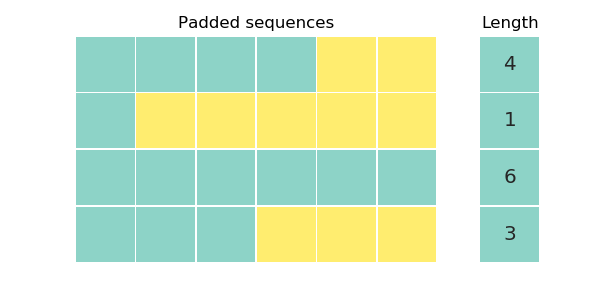

In [158]:
from torch.utils.data import DataLoader
from functools import partial

def custom_collate_fn(batch, window_size, word_to_ix):
  # Break our batch into the training examples (x) and labels (y)
  # We are turning our x and y into tensors because nn.utils.rnn.pad_sequence
  # method expects tensors. This is also useful since our model will be
  # expecting tensor inputs.
  x, y = zip(*batch)

  # We will record the number of labels so that we know
  # how many words existed in each example.
  lengths = [len(words) for words in x]
  lenghts = torch.LongTensor(lengths)

  # Now we need to window pad our training examples. We have already defined a
  # function to handle window padding. We are including it here again so that
  # everything is in one place.
  def pad_window(sentence, window_size, pad_token="<pad>"):
    window = [pad_token] * window_size
    return window + sentence + window

  # Pad the train examples.
  x = [pad_window(s, window_size=window_size) for s in x]

  # Now we need to turn words in our training examples to indices. We are
  # copying the function defined earlier for the same reason as above.
  def convert_tokens_to_indices(sentence, word_to_ix):
    return [word_to_ix.get(token, word_to_ix["<unk>"]) for token in sentence]

  # Convert the train examples into indices.
  x = [convert_tokens_to_indices(s, word_to_ix) for s in x]

  # We will now pad the examples so that the lengths of all the example in
  # one batch are the same, making it possible to do matrix operations.
  # We set the batch_first parameter to True so that the returned matrix has
  # the batch as the first dimension.
  pad_token_ix = word_to_ix["<pad>"]

  # pad_sequence function expects the input to be a tensor, so we turn x into one
  x = [torch.LongTensor(x_i) for x_i in x]
  x_padded = nn.utils.rnn.pad_sequence(x, batch_first=True, padding_value=pad_token_ix)

  y = torch.LongTensor(y)

  # We are now ready to return our variables. The order we return our variables
  # here will match the order we read them in our training loop.
  return x_padded, y, lenghts

This function seems long, but it really doesn't have to be. Check out the alternative version below where we remove the extra function declarations and comments.

In [159]:
def _custom_collate_fn(batch, window_size, word_to_ix):
  # Prepare the datapoints
  x, y = zip(*batch)
  lengths = [len(words) for words in x]
  lenghts = torch.LongTensor(lengths)
  x = [pad_window(s, window_size=window_size) for s in x]
  x = [convert_tokens_to_indices(s, word_to_ix) for s in x]

  # Pad x so that all the examples in the batch have the same size
  pad_token_ix = word_to_ix["<pad>"]
  x = [torch.LongTensor(x_i) for x_i in x]
  x_padded = nn.utils.rnn.pad_sequence(x, batch_first=True, padding_value=pad_token_ix)

  # Pad y and record the length
  lengths = [len(label) for label in y]
  lenghts = torch.LongTensor(lengths)
  y = torch.LongTensor(y)

  return x_padded, y, lenghts

Now, we can see the `DataLoader` in action.

In [160]:
# Parameters to be passed to the DataLoader
data = list(zip(train_sentences, train_labels))
batch_size = 2
shuffle = True
window_size = 2
collate_fn = partial(custom_collate_fn, window_size=window_size, word_to_ix=word_to_ix)

# Instantiate the DataLoader
loader = DataLoader(data, batch_size=batch_size, shuffle=shuffle, collate_fn=collate_fn)

# Go through one loop
counter = 0
for batched_x, batched_y, batched_lengths in loader:
  print(f"Iteration {counter}")
  print("Batched Input:")
  print(batched_x)
  print("Batched Labels:")
  print(batched_y)
  print("Batched Lengths:")
  print(batched_lengths)
  print("")
  counter += 1

Iteration 0
Batched Input:
tensor([[ 0,  0, 27,  5, 16, 30, 13,  3,  0,  0],
        [ 0,  0, 23, 19, 21, 20, 22,  0,  0,  0]])
Batched Labels:
tensor([1, 0])
Batched Lengths:
tensor([6, 5])

Iteration 1
Batched Input:
tensor([[ 0,  0, 10, 15, 12, 24,  0,  0],
        [ 0,  0, 10, 14, 11,  0,  0,  0]])
Batched Labels:
tensor([1, 0])
Batched Lengths:
tensor([4, 3])

Iteration 2
Batched Input:
tensor([[ 0,  0,  9,  7,  8, 26,  0,  0,  0],
        [ 0,  0, 31,  2,  6, 28, 17,  0,  0]])
Batched Labels:
tensor([1, 1])
Batched Lengths:
tensor([4, 5])

Iteration 3
Batched Input:
tensor([[ 0,  0, 27, 32, 13, 25, 29,  0,  0],
        [ 0,  0, 27, 18, 13,  8,  4,  0,  0]])
Batched Labels:
tensor([0, 1])
Batched Lengths:
tensor([5, 5])



The batched input tensors you see above will be passed into our model. On the other hand, we started off saying that our model will be a window classifier. The way our input tensors are currently formatted, we have all the words in a sentence in one datapoint. When we pass this input to our model, it needs to create the windows for each word.

We could avoid this problem if we formatted our data by breaking it into windows beforehand. In this example, we will instead how our model take care of the formatting.

Given that our `window_size` is `N` we want our model to make a prediction on every `2N+1` tokens. That is, if we have an input with `9` tokens, and a `window_size` of `2`, we want our model to return `5` predictions. This makes sense because before we padded it with `2` tokens on each side, our input also had `5` tokens in it!

We can create these windows by using for loops, but there is a faster `PyTorch` alternative, which is the `unfold(dimension, size, step)` method. We can create the windows we need using this method as follows:

In [161]:
# Print the original tensor
print(f"Original Tensor: ")
print(batched_x)
print("")

# Create the 2 * 2 + 1 chunks
chunk = batched_x.unfold(1, window_size*2 + 1, 1)
print(f"Windows: ")
print(chunk)

Original Tensor: 
tensor([[ 0,  0, 27, 32, 13, 25, 29,  0,  0],
        [ 0,  0, 27, 18, 13,  8,  4,  0,  0]])

Windows: 
tensor([[[ 0,  0, 27, 32, 13],
         [ 0, 27, 32, 13, 25],
         [27, 32, 13, 25, 29],
         [32, 13, 25, 29,  0],
         [13, 25, 29,  0,  0]],

        [[ 0,  0, 27, 18, 13],
         [ 0, 27, 18, 13,  8],
         [27, 18, 13,  8,  4],
         [18, 13,  8,  4,  0],
         [13,  8,  4,  0,  0]]])


### Model

Now that we have prepared our data, we are ready to build our model. We have learned how to write custom `nn.Module` classes. We will do the same here and put everything we have learned so far together.

In [162]:
class SentenceClassifier(nn.Module):

  def __init__(self, hyperparameters, vocab_size, pad_ix=0, embeds=None):
    super().__init__()

    """ Instance variables """
    self.window_size = hyperparameters["window_size"]
    self.embed_dim = hyperparameters["embed_dim"]
    self.hidden_dim = hyperparameters["hidden_dim"]
    self.freeze_embeddings = hyperparameters["freeze_embeddings"]

    """ Embedding Layer
    Takes in a tensor containing embedding indices, and returns the
    corresponding embeddings. The output is of dim
    (number_of_indices * embedding_dim).

    If freeze_embeddings is True, set the embedding layer parameters to be
    non-trainable. This is useful if we only want the parameters other than the
    embeddings parameters to change.

    """
    if embeds is None:
        self.embeds = nn.Embedding(vocab_size, self.embed_dim, padding_idx=pad_ix)
    else:
        self.embeds = nn.Embedding.from_pretrained(embeds, freeze=self.freeze_embeddings, padding_idx=pad_ix)
    if self.freeze_embeddings:
      self.embed_layer.weight.requires_grad = False

    """ Hidden Layers
    """
    full_window_size = 2 * window_size + 1
    self.hidden_layer = nn.Sequential(
      nn.Linear(full_window_size * self.embed_dim, self.hidden_dim),
      nn.ReLU()
    )

    self.globalpooling = partial(torch.mean, dim=1)

    """ Output Layer
    """
    self.output_layer = nn.Linear(self.hidden_dim, 1)

    """ Probabilities
    """
    self.probabilities = nn.Sigmoid()

  def forward(self, inputs):
    """
    Let B:= batch_size
        L:= window-padded sentence length
        D:= self.embed_dim
        S:= self.window_size
        H:= self.hidden_dim

    inputs: a (B, L) tensor of token indices
    """
    B, L = inputs.size()

    """
    Reshaping.
    Takes in a (B, L) LongTensor
    Outputs a (B, L~, S) LongTensor
    """
    # Fist, get our word windows for each word in our input.
    token_windows = inputs.unfold(1, 2 * self.window_size + 1, 1)
    _, adjusted_length, _ = token_windows.size()

    # Good idea to do internal tensor-size sanity checks, at the least in comments!
    assert token_windows.size() == (B, adjusted_length, 2 * self.window_size + 1)

    """
    Embedding.
    Takes in a torch.LongTensor of size (B, L~, S)
    Outputs a (B, L~, S, D) FloatTensor.
    """
    embedded_windows = self.embeds(token_windows)

    """
    Reshaping.
    Takes in a (B, L~, S, D) FloatTensor.
    Resizes it into a (B, L~, S*D) FloatTensor.
    -1 argument "infers" what the last dimension should be based on leftover axes.
    """
    embedded_windows = embedded_windows.view(B, adjusted_length, -1)

    """
    Layer 1.
    Takes in a (B, L~, S*D) FloatTensor.
    Resizes it into a (B, L~, H) FloatTensor
    """
    layer_1 = self.hidden_layer(embedded_windows)

    """
    Layer 2
    Takes in a (B, L~, H) FloatTensor
    Resizes it into a (B, H)
    """
    layer_2 = self.globalpooling(layer_1)

    """
    Layer 3
    Takes in a (B, H) FloatTensor.
    Resizes it into a (B, 1) FloatTensor.
    """
    output = self.output_layer(layer_2)

    """
    Softmax.
    Takes in a (B, 1) FloatTensor of unnormalized class scores.
    Outputs a (B) FloatTensor of (log-)normalized class scores.
    """
    output = self.probabilities(output)
    output = output.view(B)

    return output

### Training

We are now ready to put everything together. Let's start with preparing our data and intializing our model. We can then intialize our optimizer and define our loss function. This time, instead of using one of the predefined loss function as we did before, we will define our own loss function.

In [163]:
# Prepare the data
data = list(zip(train_sentences, train_labels))
batch_size = 2
shuffle = True
window_size = 2
collate_fn = partial(custom_collate_fn, window_size=window_size, word_to_ix=word_to_ix)

# Instantiate a DataLoader
loader = DataLoader(data, batch_size=batch_size, shuffle=shuffle, collate_fn=collate_fn)

# Initialize a model
# It is useful to put all the model hyperparameters in a dictionary
model_hyperparameters = {
    "batch_size": 4,
    "window_size": 2,
    "embed_dim": 25,
    "hidden_dim": 25,
    "freeze_embeddings": False,
}

vocab_size = len(word_to_ix)
model = SentenceClassifier(model_hyperparameters, vocab_size)

# Define an optimizer
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Define a loss function, which computes to binary cross entropy loss
def loss_function(batch_outputs, batch_labels, batch_lengths):
    # Calculate the loss for the whole batch
    bceloss = nn.BCELoss()
    loss = bceloss(batch_outputs, batch_labels.float())

    # Rescale the loss. Remember that we have used lengths to store the
    # number of words in each training example
    loss = loss / batch_lengths.sum().float()

    return loss

Unlike our earlier example, this time instead of passing all of our training data to the model at once in each epoch, we will be utilizing batches. Hence, in each training epoch iteration, we also iterate over the batches.

In [164]:
# Function that will be called in every epoch
def train_epoch(loss_function, optimizer, model, loader):

  # Keep track of the total loss for the batch
  total_loss = 0
  for batch_inputs, batch_labels, batch_lengths in loader:
    # Clear the gradients
    optimizer.zero_grad()
    # Run a forward pass
    outputs = model.forward(batch_inputs)
    # Compute the batch loss
    loss = loss_function(outputs, batch_labels, batch_lengths)
    # Calculate the gradients
    loss.backward()
    # Update the parameteres
    optimizer.step()
    total_loss += loss.item()

  return total_loss


# Function containing our main training loop
def train(loss_function, optimizer, model, loader, num_epochs=10000):

  # Iterate through each epoch and call our train_epoch function
  for epoch in range(num_epochs):
    epoch_loss = train_epoch(loss_function, optimizer, model, loader)
    if epoch % 100 == 0: print(epoch_loss)

Let's start training!

In [165]:
num_epochs = 500
train(loss_function, optimizer, model, loader, num_epochs=num_epochs)

0.3029877506196499
0.27535929158329964
0.25787004083395004
0.24039870128035545
0.22824683412909508


### Prediction

Let's see how well our model is at making predictions. We can start by creating our test data.

In [166]:
# Create test sentences
test_corpus = ["She comes from Paris", "I like wind", "She comes Paris", "She comes to Paris", "She comes from Moscow to Tver"]
test_sentences = [s.lower().split() for s in test_corpus]
test_labels = [1, 0, 1, 1, 1]

# Create a test loader
test_data = list(zip(test_sentences, test_labels))
batch_size = 1
shuffle = False
window_size = 2
collate_fn = partial(custom_collate_fn, window_size=2, word_to_ix=word_to_ix)
test_loader = torch.utils.data.DataLoader(test_data,
                                           batch_size=1,
                                           shuffle=False,
                                           collate_fn=collate_fn)

Let's loop over our test examples to see how well we are doing.

In [168]:
for (test_instance, labels, _), text in zip(test_loader, test_corpus):
  outputs = model.forward(test_instance)
  print(labels)
  print(text)
  print(outputs)
  print()

tensor([1])
She comes from Paris
tensor([0.6772], grad_fn=<ViewBackward0>)

tensor([0])
I like wind
tensor([0.4377], grad_fn=<ViewBackward0>)

tensor([1])
She comes Paris
tensor([0.5806], grad_fn=<ViewBackward0>)

tensor([1])
She comes to Paris
tensor([0.6673], grad_fn=<ViewBackward0>)

tensor([1])
She comes from Moscow to Tver
tensor([0.7414], grad_fn=<ViewBackward0>)

